In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## [16.3.1 Exercises](https://r4ds.hadley.nz/factors#exercises)

1. Explore the distribution of rincome (reported income). What makes the default bar chart hard to understand? How could you improve the plot?

The default width of the bar chart is too narrow so you can't read the x axis. To fix this, you can resized the chart.

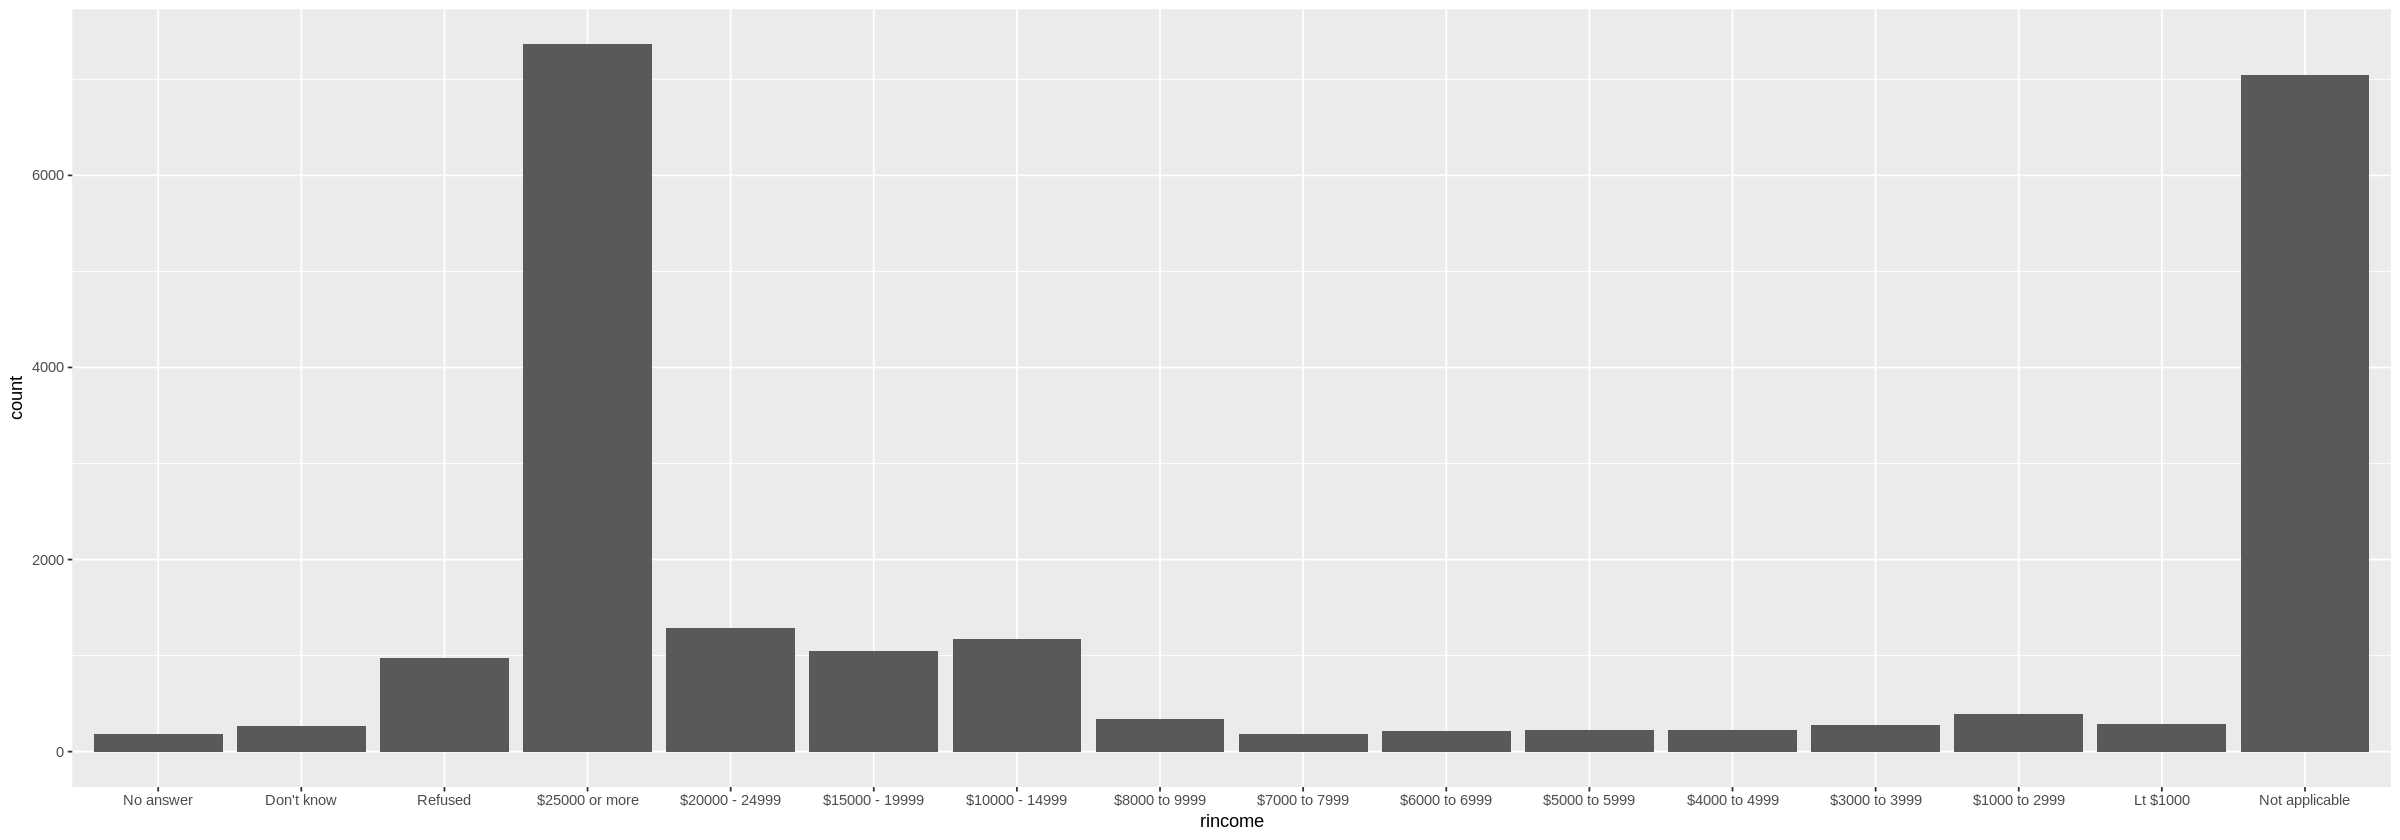

In [18]:
options(repr.plot.width = 20, repr.plot.height = 7)
gss_cat |>
    ggplot(aes(x = rincome)) +
    geom_bar()

2. What is the most common relig in this survey? What’s the most common partyid?

In [27]:
gss_cat |>
    count(relig) |>
    arrange(desc(n))

gss_cat |>
    count(partyid) |>
    arrange(desc(n))

relig,n
<fct>,<int>
Protestant,10846
Catholic,5124
None,3523
Christian,689
Jewish,388
Other,224
Buddhism,147
Inter-nondenominational,109
Moslem/islam,104


partyid,n
<fct>,<int>
Independent,4119
Not str democrat,3690
Strong democrat,3490
Not str republican,3032
"Ind,near dem",2499
Strong republican,2314
"Ind,near rep",1791
Other party,393
No answer,154


The most common relig is Protestant and the most common partyid is Independent.

3. Which relig does denom (denomination) apply to? How can you find out with a table? How can you find out with a visualization?

In [37]:
gss_cat |>
    select(relig, denom) |>
    filter(!denom %in% c("No denomination", "Not applicable", "Other", "No answer", "Don't know")) |>
    distinct(relig)


relig
<fct>
Protestant


## [16.4.1 Exercises](https://r4ds.hadley.nz/factors#exercises-1)

1. There are some suspiciously high numbers in tvhours. Is the mean a good summary?

Warning message:
“Removed 10146 rows containing non-finite outside the scale range
(`stat_count()`).”


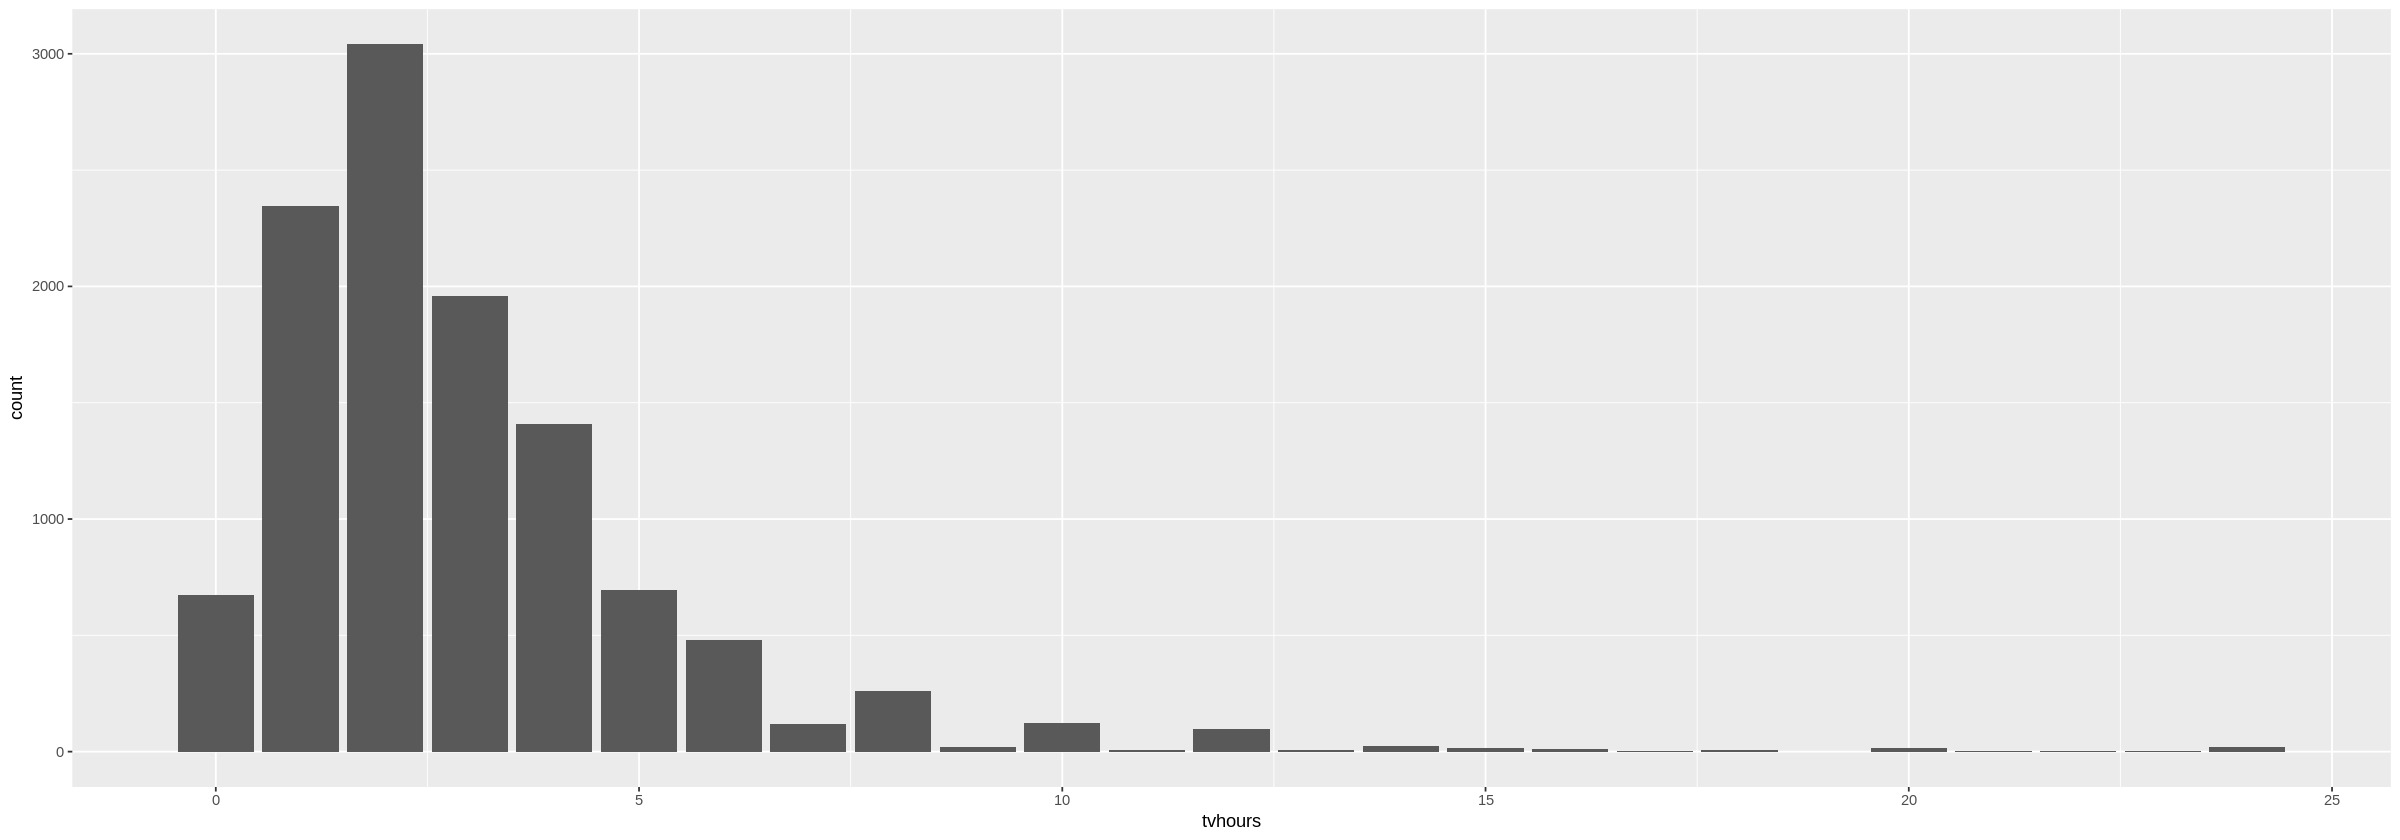

In [48]:
gss_cat |>
    select(tvhours) |>
    ggplot(aes(x = tvhours)) +
    geom_bar()

Since the distribution of tvhours is very rightly skewed, the mean is not a good summary.

2. For each factor in gss_cat identify whether the order of the levels is arbitrary or principled.

In [51]:
head(gss_cat)

year,marital,age,race,rincome,partyid,relig,denom,tvhours
<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
2000,Never married,26,White,$8000 to 9999,"Ind,near rep",Protestant,Southern baptist,12
2000,Divorced,48,White,$8000 to 9999,Not str republican,Protestant,Baptist-dk which,NA
2000,Widowed,67,White,Not applicable,Independent,Protestant,No denomination,2
2000,Never married,39,White,Not applicable,"Ind,near rep",Orthodox-christian,Not applicable,4
2000,Divorced,25,White,Not applicable,Not str democrat,None,Not applicable,1
2000,Married,25,White,$20000 - 24999,Strong democrat,Protestant,Southern baptist,NA


Only rincome is principled, the rest are arbitrary.

3. Why did moving “Not applicable” to the front of the levels move it to the bottom of the plot?

The plot levels go from the bottom up so the first in the list of levels is at the bottom of the plot and the last level is at the top.

## [16.5.1 Exercises](https://r4ds.hadley.nz/factors#exercises-2)

1. How have the proportions of people identifying as Democrat, Republican, and Independent changed over time?

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


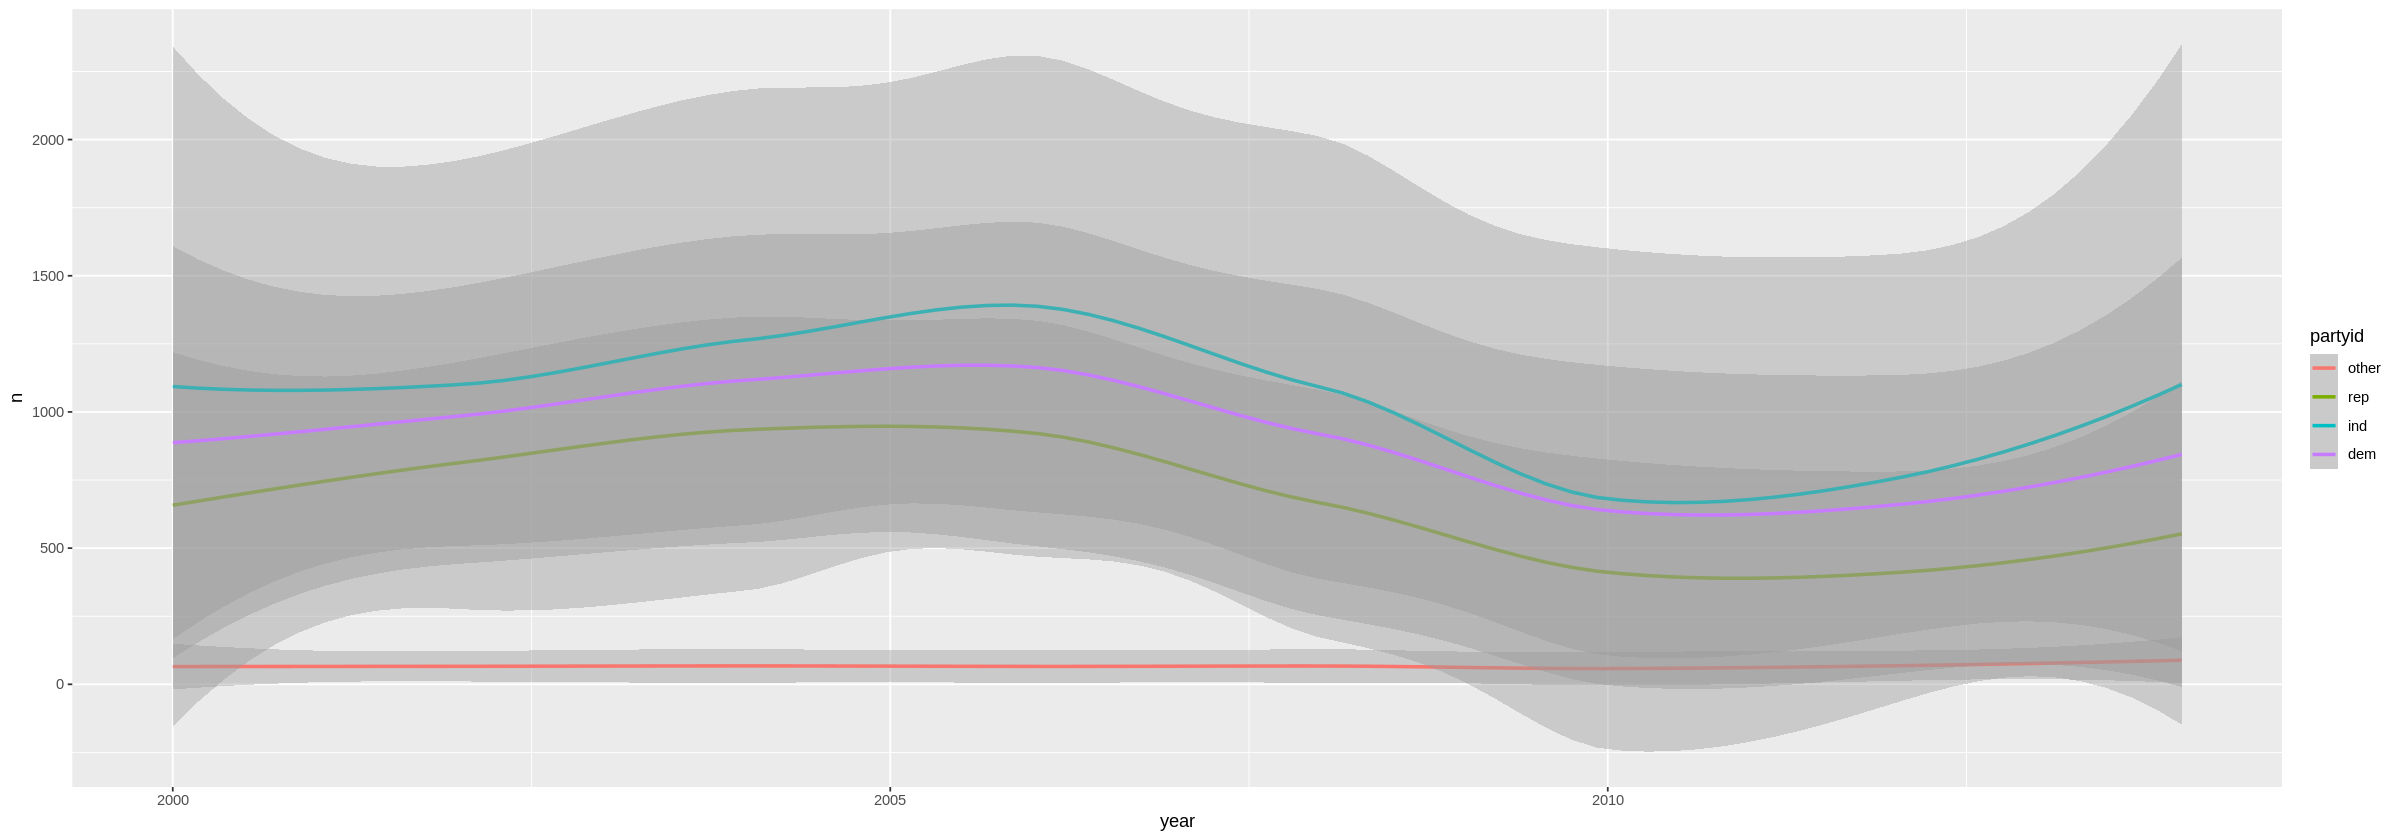

In [68]:
gss_cat |>
  mutate(
    partyid = fct_collapse(partyid,
      "other" = c("No answer", "Don't know", "Other party"),
      "rep" = c("Strong republican", "Not str republican"),
      "ind" = c("Ind,near rep", "Independent", "Ind,near dem"),
      "dem" = c("Not str democrat", "Strong democrat")
    )
  ) |>
  group_by(year) |>
  count(partyid) |>
  ggplot(aes(x = year, y = n)) +
  geom_smooth(aes(color = partyid))

The lines are all fairly parallel to each other, so the proportions didn't change much over time.

2. How could you collapse rincome into a small set of categories?

In [76]:
gss_cat |>
  mutate(
    rincome = fct_collapse(rincome,
      "other" = c("No answer", "Don't know", "Refused", "Not applicable"),
      "low" = c("$4000 to 4999", "$3000 to 3999", "$1000 to 2999", "Lt $1000"),
      "medium" = c("$10000 - 14999", "$8000 to 9999", "$7000 to 7999", "$6000 to 6999", "$5000 to 5999"),
      "high" = c("$25000 or more", "$20000 - 24999", "$15000 - 19999")
    )
  ) |>
  count(rincome)

rincome,n
<fct>,<int>
other,8468
high,9694
medium,2138
low,1183


3. Notice there are 9 groups (excluding other) in the fct_lump example above. Why not 10? (Hint: type ?fct_lump, and find the default for the argument other_level is “Other”.)

One of the original 10 groups is combined into the "Other" level, leaving 9 distinct groups.